In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv ("household_power_consumption.txt", sep=";",
                    header=0, low_memory=False, infer_datetime_format=True, 
                    parse_dates={"datetime":[0,1]},index_col=["datetime"])

In [3]:
df.head(3)
df.shape

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


(2075259, 7)

In [4]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
#!pip install -U pandas-profiling

In [6]:
import pandas_profiling as pp

In [7]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof
#prof.to_file(output_file='output.html')

In [8]:
count_na = 0
for values in df.values.tolist():
    for value in values:
        if value == '?':
            count_na += 1
        else:
            continue
            
print(count_na)

155874


In [9]:
df.replace("?", np.nan, inplace = True)

df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
for column in df.select_dtypes(include=['object']).columns:
    df[[column]] = df[[column]].astype('float')

In [11]:
df= df.fillna(method='ffill')
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df_new = df.copy()
df_new['active_energy_consumed'] = df_new.apply(lambda row: row.Global_active_power  * 1000/60 - row.Sub_metering_1 
                                        - row.Sub_metering_2 - row.Sub_metering_3, axis=1)
df_new.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumed
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


Time Series Specific Exploratory Methods

In [14]:
import statsmodels.api as sm

from pylab import rcParams 

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


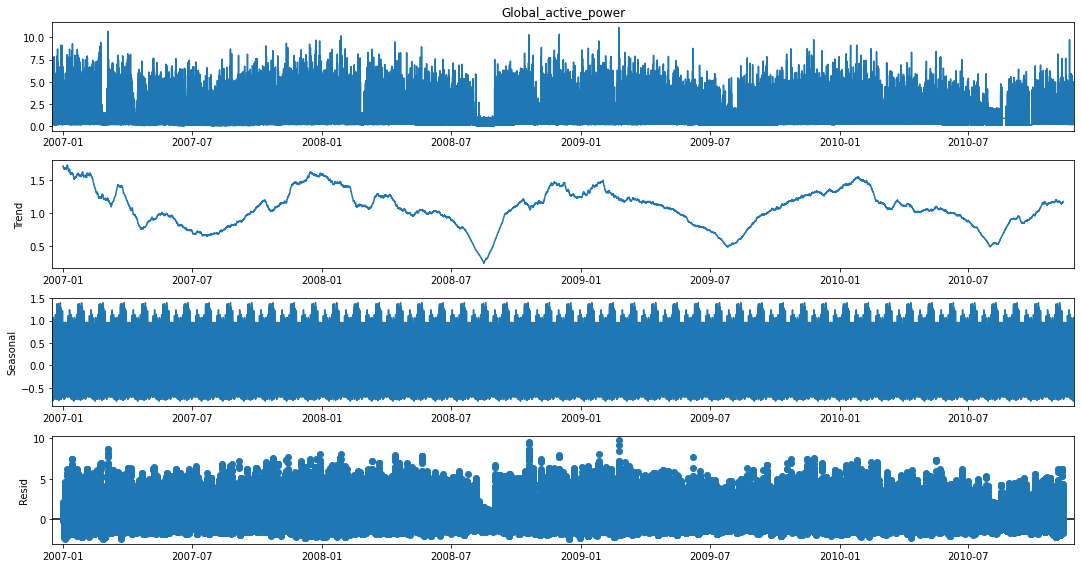

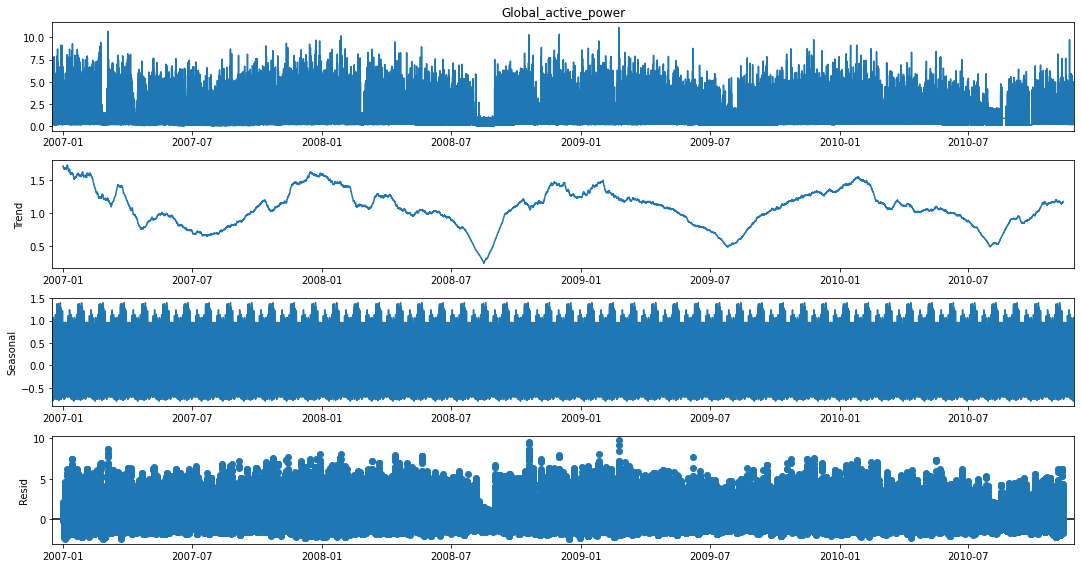

In [15]:
rcParams['figure.figsize'] = 15, 8

#60 mins, 24 hrs, 30 days = 43200
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], freq = 43200, model='additive')
decompose_series.plot()
plt.show()

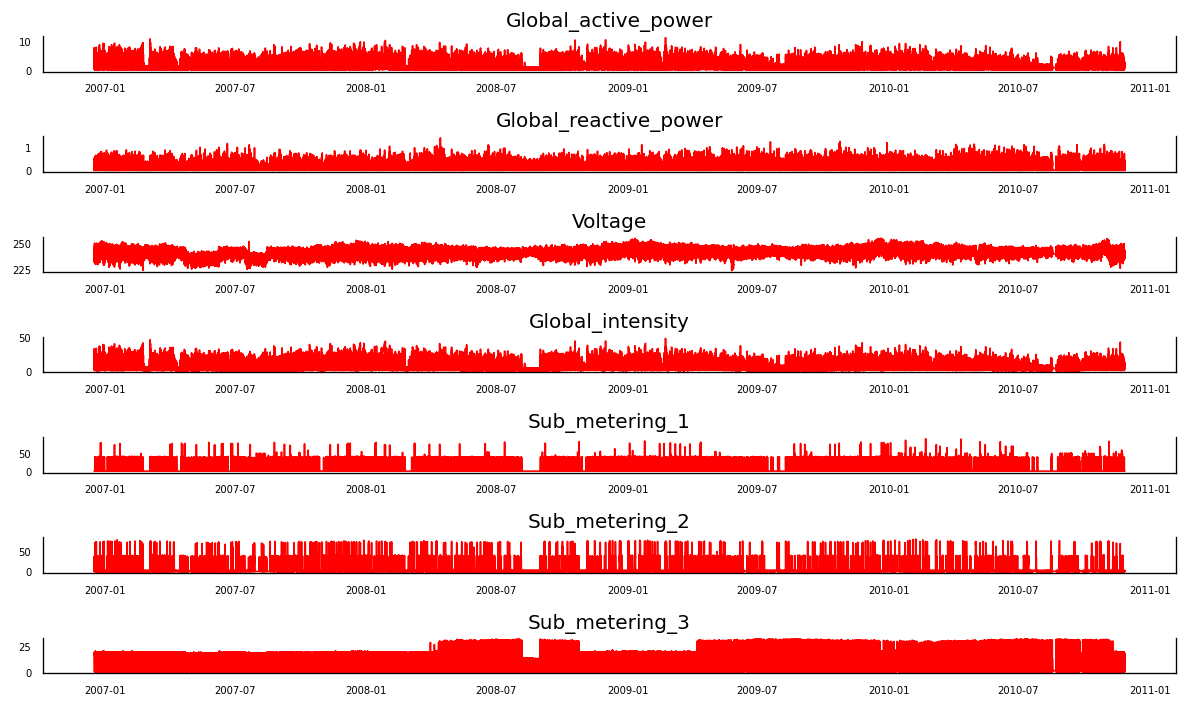

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, '2007')

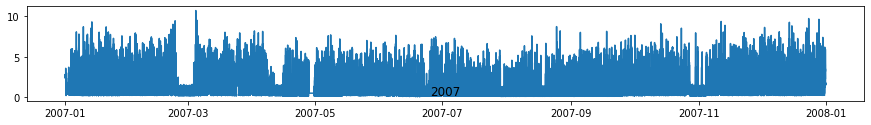

Text(0.5, 0, '2008')

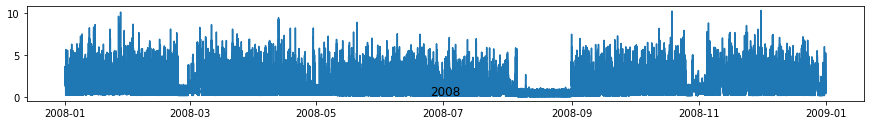

Text(0.5, 0, '2009')

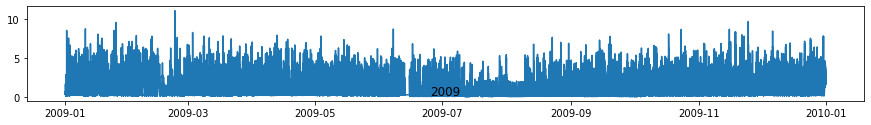

Text(0.5, 0, '2010')

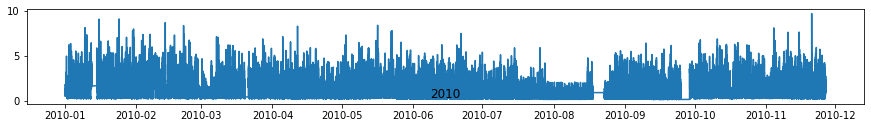

In [19]:
years = ["2007", "2008", "2009", "2010"]
plt.figure()

for i in range(len(years)):
    ax=plt.subplot(len(years), 1, i+1)
    year =years[i]
    result=df[str(year)] #yearly observations
    plt.plot(result["Global_active_power"])
    plt.title(str(year), y=0, loc="center")
    plt.show()

In [20]:
#Downsample 
df_daily = df.resample('D').mean()
df_daily.head(3)
df_daily.isna().sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -3.734758680846018
p-value: 0.0036499731073697025
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


From the results obtained, the p-value is greater than the critical value at a 5% #significance level, 
the ADF statistic is less than that any of the critical values obtain.
#This confirms that the series is indeed stationary.

In [22]:
#Downsample 
df_monthly = df.resample('M').mean()
df_monthly.head(3)
df_monthly.isna().sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847
2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759
2007-02-28,1.401165,0.113634,240.519177,5.914911,1.180159,1.602282,6.704067


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [23]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -4.6164684157518145
p-value: 0.00012043644200149809
No. of lags used: 9
No. of observations used : 38
Critical Values:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418


In [ ]:
From the results obtained, the p-value is greater than the critical value at a 5% #significance level 
#the ADF statistic is less than that any of the critical values obtain.
#This confirms that the series is non-stationary.

In [24]:
df_monthly = df_monthly.reset_index()
df_monthly.head(2)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847
1,2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759


In [25]:
df_monthly= df_monthly.drop(columns = [ 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
      'Sub_metering_3',])
df_monthly.head(2)

,datetime,Global_active_power
0,2006-12-31,1.901537
1,2007-01-31,1.546085


In [26]:
df_monthly.shape

df_monthly =df_monthly.rename(columns={"datetime": "ds", "Global_active_power": "y"}) 
df_monthly = df_monthly[["ds","y"]]
df_monthly.head(3)

(48, 2)

,ds,y
0,2006-12-31,1.901537
1,2007-01-31,1.546085
2,2007-02-28,1.401165


In [27]:
from fbprophet import Prophet

model = Prophet()
model.fit(df_monthly)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [33]:
 #predict for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,1.170982,1.533894,1.729569,1.170982,1.170982,0.461804,0.461804,0.461804,0.461804,0.461804,0.461804,0.0,0.0,0.0,1.632786
1,2007-01-31,1.168197,1.398112,1.591119,1.168197,1.168197,0.323716,0.323716,0.323716,0.323716,0.323716,0.323716,0.0,0.0,0.0,1.491913
2,2007-02-28,1.165681,1.322385,1.512722,1.165681,1.165681,0.250739,0.250739,0.250739,0.250739,0.250739,0.250739,0.0,0.0,0.0,1.416420
3,2007-03-31,1.162896,1.167310,1.366674,1.162896,1.162896,0.103693,0.103693,0.103693,0.103693,0.103693,0.103693,0.0,0.0,0.0,1.266589
4,2007-04-30,1.160201,0.854366,1.052916,1.160201,1.160201,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,0.0,0.0,0.0,0.957264
5,2007-05-31,1.157416,0.991517,1.190790,1.157416,1.157416,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,0.0,0.0,0.0,1.091149
6,2007-06-30,1.154720,0.808436,1.007905,1.154720,1.154720,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,0.0,0.0,0.0,0.910971
7,2007-07-31,1.151935,0.612840,0.810358,1.151935,1.151935,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,0.0,0.0,0.0,0.705883
8,2007-08-31,1.149150,0.727792,0.915463,1.149150,1.149150,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,0.0,0.0,0.0,0.822080
9,2007-09-30,1.146455,0.817646,1.007777,1.146455,1.146455,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,0.0,0.0,0.0,0.913194


In [29]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.632786,1.541295,1.734003,1.170982,1.170982,1.170982
1,2007-01-31,1.491913,1.386471,1.590065,1.168197,1.168197,1.168197
2,2007-02-28,1.416420,1.309687,1.510740,1.165681,1.165681,1.165681
3,2007-03-31,1.266589,1.167603,1.362704,1.162896,1.162896,1.162896
4,2007-04-30,0.957264,0.861396,1.061468,1.160201,1.160201,1.160201
5,2007-05-31,1.091149,0.993801,1.184809,1.157416,1.157416,1.157416
6,2007-06-30,0.910971,0.812782,1.007181,1.154720,1.154720,1.154720
7,2007-07-31,0.705883,0.613650,0.805576,1.151935,1.151935,1.151935
8,2007-08-31,0.822080,0.724595,0.927247,1.149150,1.149150,1.149150
9,2007-09-30,0.913194,0.815492,1.011317,1.146455,1.146455,1.146455


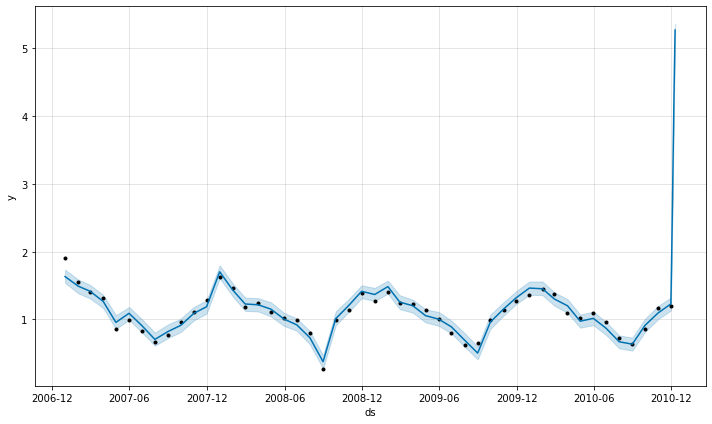

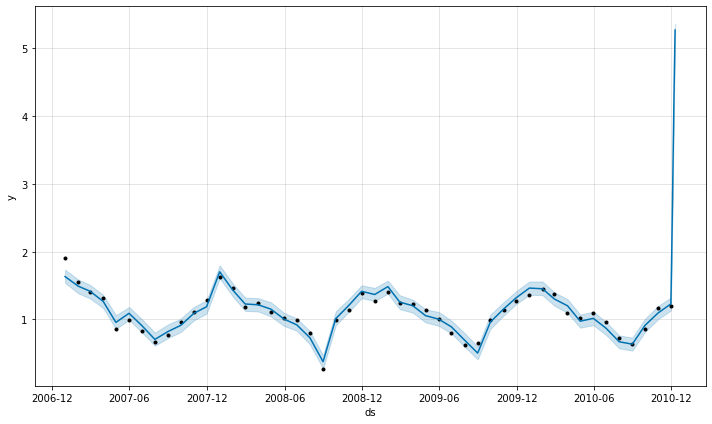

In [31]:
model.plot(forecast)

In [32]:
df_daily = df_daily.reset_index()

df_daily= df_daily.drop(columns = [ 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
      'Sub_metering_3',])
df_daily.head(2)

,datetime,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486


In [41]:
df_daily.shape

df_daily =df_daily.rename(columns={"datetime": "ds", "Global_active_power": "y"}) 
df_daily = df_daily[["ds","y"]]
df_daily.head(3)

(48, 2)

,ds,y
0,2006-12-31,1.901537
1,2007-01-31,1.546085
2,2007-02-28,1.401165


In [42]:
from fbprophet import Prophet

model2 = Prophet()
model2.fit(df_daily) 
    
#predict for the next 30 days
future = model2.make_future_dataframe(periods=30, freq='D') 
forecast2 = model2.predict(future) 
forecast2.head(10)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,1.170982,1.531406,1.734005,1.170982,1.170982,0.461804,0.461804,0.461804,0.461804,0.461804,0.461804,0.0,0.0,0.0,1.632786
1,2007-01-31,1.168197,1.400580,1.585307,1.168197,1.168197,0.323716,0.323716,0.323716,0.323716,0.323716,0.323716,0.0,0.0,0.0,1.491913
2,2007-02-28,1.165681,1.330602,1.509001,1.165681,1.165681,0.250739,0.250739,0.250739,0.250739,0.250739,0.250739,0.0,0.0,0.0,1.416420
3,2007-03-31,1.162896,1.166246,1.359935,1.162896,1.162896,0.103693,0.103693,0.103693,0.103693,0.103693,0.103693,0.0,0.0,0.0,1.266589
4,2007-04-30,1.160201,0.859371,1.061942,1.160201,1.160201,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,0.0,0.0,0.0,0.957264
5,2007-05-31,1.157416,0.997886,1.184933,1.157416,1.157416,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,0.0,0.0,0.0,1.091149
6,2007-06-30,1.154720,0.819873,1.015086,1.154720,1.154720,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,0.0,0.0,0.0,0.910971
7,2007-07-31,1.151935,0.608819,0.803962,1.151935,1.151935,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,0.0,0.0,0.0,0.705883
8,2007-08-31,1.149150,0.726617,0.921935,1.149150,1.149150,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,0.0,0.0,0.0,0.822080
9,2007-09-30,1.146455,0.813806,1.009622,1.146455,1.146455,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,0.0,0.0,0.0,0.913194


In [43]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.632786,1.531406,1.734005,1.170982,1.170982,1.170982
1,2007-01-31,1.491913,1.400580,1.585307,1.168197,1.168197,1.168197
2,2007-02-28,1.416420,1.330602,1.509001,1.165681,1.165681,1.165681
3,2007-03-31,1.266589,1.166246,1.359935,1.162896,1.162896,1.162896
4,2007-04-30,0.957264,0.859371,1.061942,1.160201,1.160201,1.160201
...,...,...,...,...,...,...,...
73,2010-12-26,3.756913,3.654541,3.848852,1.097927,1.097907,1.097946
74,2010-12-27,3.313517,3.213571,3.411794,1.097911,1.097890,1.097933
75,2010-12-28,2.864801,2.765872,2.968237,1.097895,1.097871,1.097919
76,2010-12-29,2.418237,2.320743,2.514791,1.097879,1.097853,1.097905


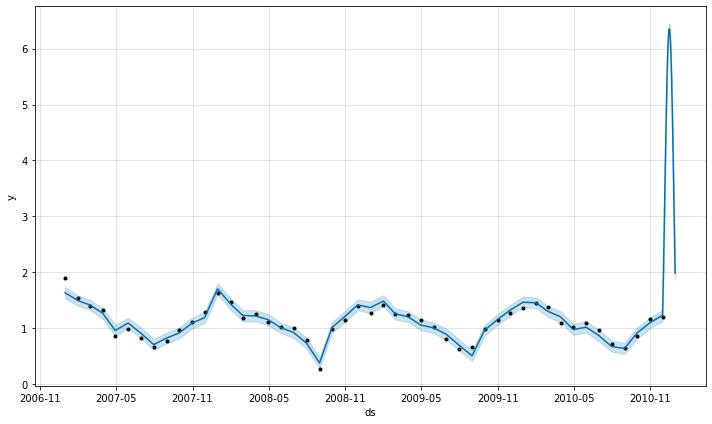

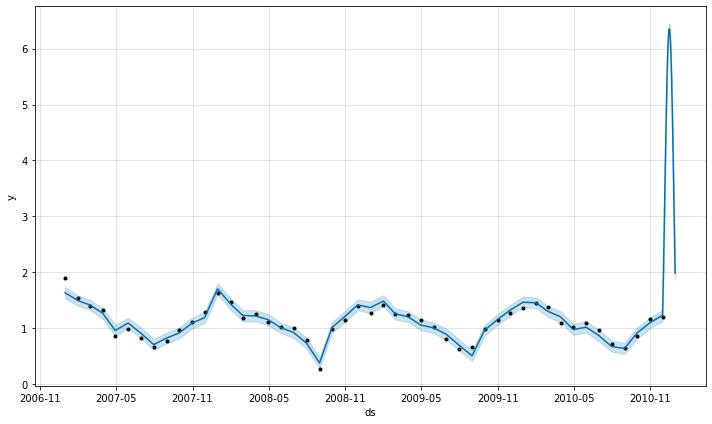

In [44]:
model.plot(forecast2)